In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/machine learning/algorithms/supervised/regressions/linear regression/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
# Removing the Index column
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Exploratory Data Analysis 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


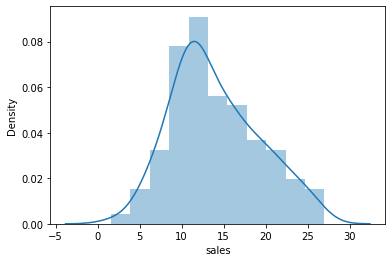

In [ ]:
sns.distplot(df.sales)
plt.show()

The sales distribution seems to be normal distribution.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


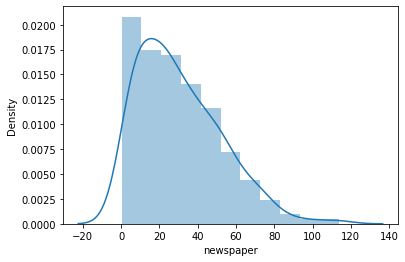

In [ ]:
sns.distplot(df.newspaper)
plt.show()

Spends on newspaper advertisenment is right skewed and most of the spends on newspaper are fairly low.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


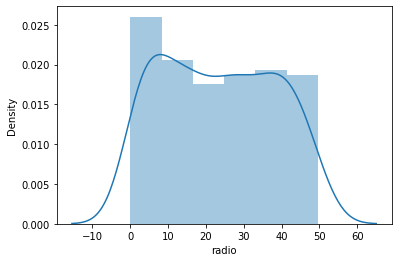

In [ ]:
sns.distplot(df.radio)
plt.show()

Spends on radio advertisenment is a uniform distribution and are comparitably higher than others.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


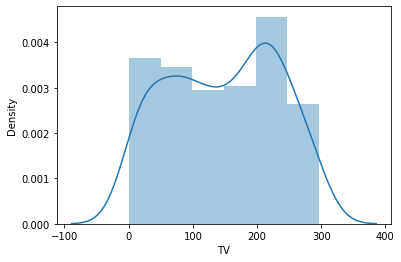

In [ ]:
sns.distplot(df.TV)
plt.show()

Spends on TV advertisenment is a uniform distribution and are comparitably higher than others.

### Exploring Relationship between Predictors and Response

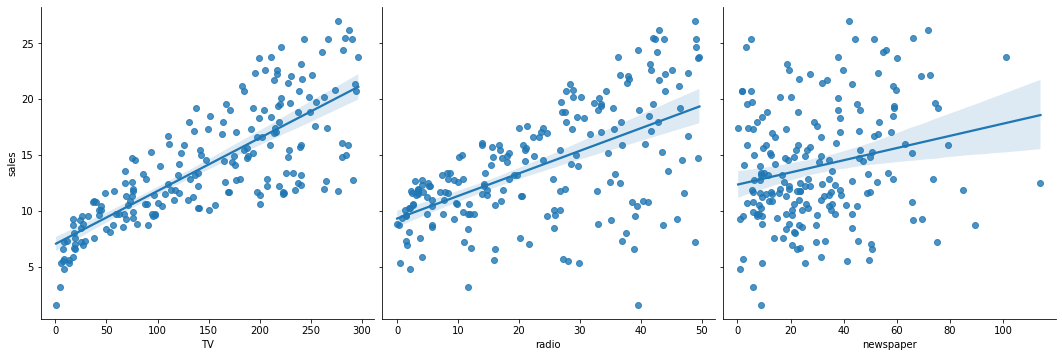

In [ ]:
sns.pairplot(df, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', height = 5, kind = 'reg')
plt.show()

By looking at the graphs we can conclude that TV is highly correlated in comparison of radio and newspaper. 

In [ ]:
df.TV.corr(df.sales)

0.7822244248616061

In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Thus we can say that TV is highly related amongst all.

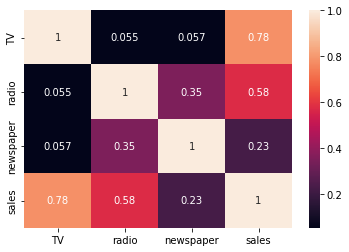

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.show()

### Simple Linear Regression Model

In [ ]:
# preparing data for training model
X = df[['TV']]
y = df.sales

In [ ]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [ ]:
X.shape

(200, 1)

In [ ]:
y.shape

(200,)

In [ ]:
# splitting data into training set testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
X_train.shape

(150, 1)

In [ ]:
y_train.shape

(150,)

In [ ]:
X_test.shape

(50, 1)

In [ ]:
y_test.shape

(50,)

In [ ]:
# Training the simple linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Interpreting Model Coefficients
print(linreg.intercept_)
print(linreg.coef_)

6.9119726188687185
[0.04802945]


In [ ]:
# Making predictions with our model
y_pred = linreg.predict(X_test)
y_pred[:5]

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704])

### Model Evaluation

In [ ]:
from sklearn import metrics
print(f"Mean Absolute Error of our model is : {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error of our model is : {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error of our model is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

Mean Absolute Error of our model is : 2.4643080986027908
Mean Squared Error of our model is : 10.310069587813155
Root Mean Squared Error of our model is : 3.210929707703542
